#### The purpose of this notebook is for exploratory data analysis of the dataset. This is to understand the dataset in-depth and gain an intuition about fake and true news.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import re
import gensim
import spacy
import textstat
from textblob import TextBlob
import statsmodels.api as sm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.style as style
style.available
sns.set_context('talk')
style.use('fivethirtyeight')
from matplotlib.pyplot import figure, show
from IPython.core.display import display, HTML
from matplotlib.pyplot import figure
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image

# Importing custom python module
from preprocess import Preprocesser

In [2]:
fake = pd.read_csv("data/Fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [21]:
fake.shape

(23481, 5)

In [3]:
real = pd.read_csv("data/True.csv")
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [22]:
real.shape

(21417, 5)

In [4]:
print("Fake news",fake.isnull().sum())

Fake news title      0
text       0
subject    0
date       0
dtype: int64


In [5]:
print("Real news",real.isnull().sum())

Real news title      0
text       0
subject    0
date       0
dtype: int64


In [23]:
print("Fake news categories are {}".format(fake["subject"].unique()))
print("Number of fake news titles are {}".format(len(fake["title"].unique())))
print()
print("Real news categories are {}".format(real["subject"].unique()))
print("Number of real news titles are {}".format(len(real["title"].unique())))

Fake news categories are ['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']
Number of fake news titles are 17903

Real news categories are ['politicsNews' 'worldnews']
Number of real news titles are 20826


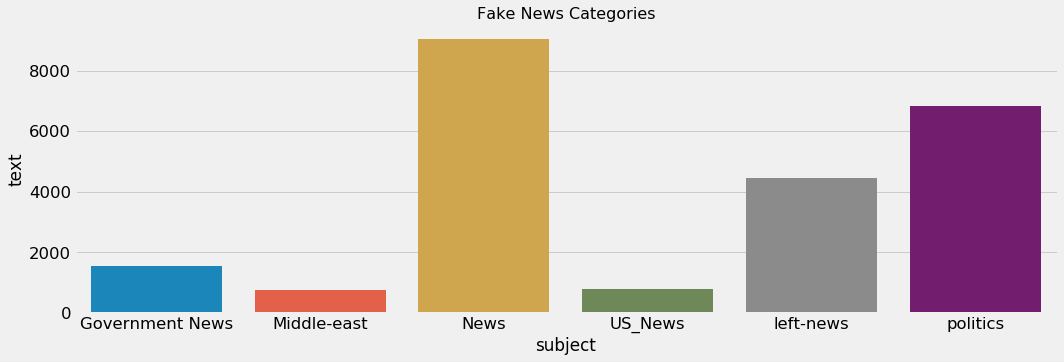

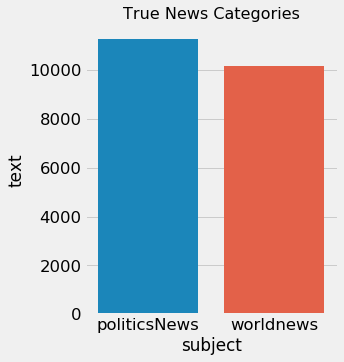

In [7]:
# Plot x = news Categories and y = Text count
fakegrp = fake.groupby("subject").agg({"text":"count"})
fakegrp = fakegrp.reset_index()

sns.factorplot(x = "subject", y = "text", data = fakegrp, kind = "bar", aspect = 3)
plt.title("Fake News Categories", fontsize=16)
plt.show()

real.groupby("subject").agg({"text":"count"})

realgrp = real.groupby("subject").agg({"text":"count"})
realgrp = realgrp.reset_index()

sns.factorplot(x = "subject", y = "text", data = realgrp, kind = "bar", aspect = 1)
plt.title("True News Categories", fontsize=16)
plt.show()

In [8]:
fake["label"] = "fake"
real["label"] = "real"
news_df = pd.concat([fake, real])
news_df["word_count"] = news_df["text"].apply(lambda x: len(x.split()))
news_df.head()

,title,text,subject,date,label,word_count
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,495
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,305
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,580
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,444
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,420


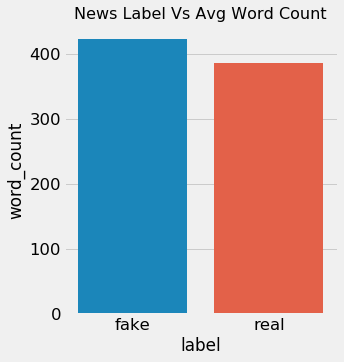

In [9]:
news_grp = news_df.groupby("label").agg({"word_count":"mean"})
news_grp = news_grp.reset_index()
news_grp.head()
sns.factorplot(x = "label", y = "word_count", data = news_grp, kind = "bar", aspect = 1)
plt.title("News Label Vs Avg Word Count", fontsize=16)
plt.show()

### Pre-process text data using custom python modules

In [10]:
!pygmentize preprocess.py

import en_core_web_sm
nlp = en_core_web_sm.load()
import gensim
import spacy
import re
from sklearn.feature_extraction.text import CountVectorizer

class Preprocesser:
    def get_text_lst(self,dataframe):
        """
        Function to convert text to list and remove emails, new lines and single quotes
        """
        text_lst = dataframe.text.values.tolist()
        text_lst = [re.sub(r'\S*@\S*\s?', '', sentence) for sentence in text_lst]
        text_lst = [re.sub(r'\s+', ' ', sentence) for sentence in text_lst]
        text_lst = [re.sub(r"\'", "", sentence) for sentence in text_lst]
        return text_lst

    def sentence_to_words(self,sentences):
        """
        Function to convert sentence to words and remove punctuations
        """
        for sentence in sentences:
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
    
    def lemmatization(self,texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
        """
        Function to lemmat

#### Pre-process fake news

In [11]:
pre_process_fake = Preprocesser()

In [12]:
text_lst = pre_process_fake.get_text_lst(fake)
text_words = pre_process_fake.sentence_to_words(text_lst)
text_lemma = pre_process_fake.lemmatization(text_words, allowed_postags=['NOUN', 'VERB']) #filtering noun and verb

In [13]:
print(text_lemma[0:1])

['wish leave give shout enemy hater news medium reality show star job country grow want wish friend supporter enemy hater news medium year pant tweet will year country grow want wish friend supporter enemy hater news medium year will year trump go expect kind send year greeting gibberish trump lack decency win allow rise gutter wish year one like calvin impeachment would make year will accept regain control hear talk include people hate wonder hate use word hater year can say year trump year tweet year include enemy fight lose know love trump trump be do year trump direct message enemy hater year anniversary pic twitter com holiday tweet work become be difference year filter break use term hater fuck year know people vote hole think would change get power year man change year photo image']


In [14]:
text_vectorized,vec = pre_process_fake.vectorizer(fake,text_lemma)
fake_final_top_n = pre_process_fake.get_top_n_words(text_vectorized,vec,200)

In [15]:
pre_process_real = Preprocesser()

#### Pre-process true news

In [16]:
text_lst = pre_process_real.get_text_lst(real)
text_words = pre_process_real.sentence_to_words(text_lst)
text_lemma = pre_process_real.lemmatization(text_words, allowed_postags=['NOUN', 'VERB']) #filtering noun and verb

In [17]:
print(text_lemma[0:1])

['reuter head faction vote month expansion debt pay tax cut call conservative urge budget restraint keep pivot way meadow speak face nation draw line spending lawmaker brace battle return holiday lawmaker will begin try pass budget fight link issue immigration policy election campaign approach will seek keep control want budget increase spending want increase defense spending program support education research infrastructure health protection administration say re go increase defense spending percent meadow chairman say program say need give government pay raise percent see rationale run people money say meadow vote party debt finance tax overhaul expect balloon budget deficit add year debt hear talk responsibility say say tax bill would require borrow pay generation finance tax cut corporation bill ve see pass history think re go pay year come say insist tax package tax overhaul year will boost economy job growth house speaker support tax bill go meadow make radio interview welfare en

In [18]:
text_vectorized,vec = pre_process_real.vectorizer(real,text_lemma)
real_final_top_n = pre_process_real.get_top_n_words(text_vectorized,vec,200)

## Word Clouds

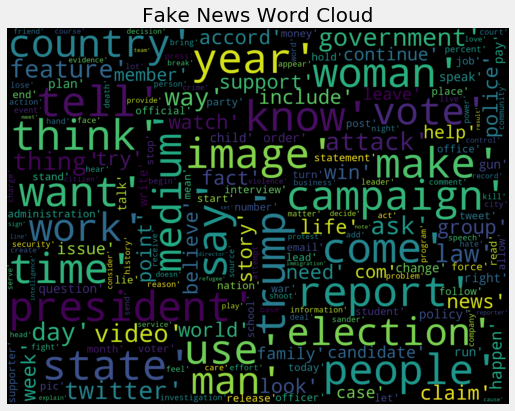

In [19]:
text = str(fake_final_top_n)
wordcloud = WordCloud(width=2400, height=1800,min_font_size = 4, max_font_size = 200, 
                      font_step=1, max_words=500).generate("".join(text))
plt.figure(figsize=(8,10))
plt.title("Fake News Word Cloud", fontsize=20)
plt.imshow(wordcloud, interpolation ="bilinear")
plt.axis("off")
plt.show()

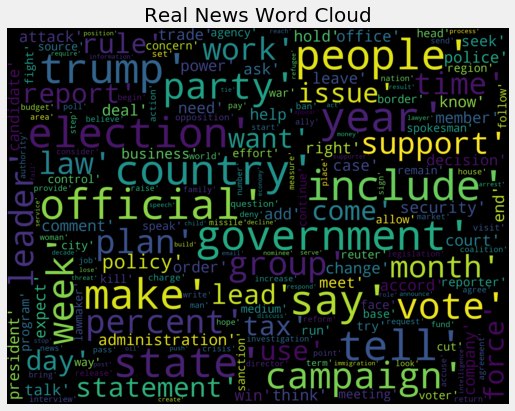

In [20]:
text = str(real_final_top_n)
wordcloud = WordCloud(width=2400, height=1800, min_font_size = 4, max_font_size = 200, 
                      font_step=1, max_words=500).generate("".join(text))
plt.figure(figsize=(8,10))
plt.title("Real News Word Cloud",fontsize=20)
plt.imshow(wordcloud, interpolation ="bilinear")
plt.axis("off")
plt.show()
